[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


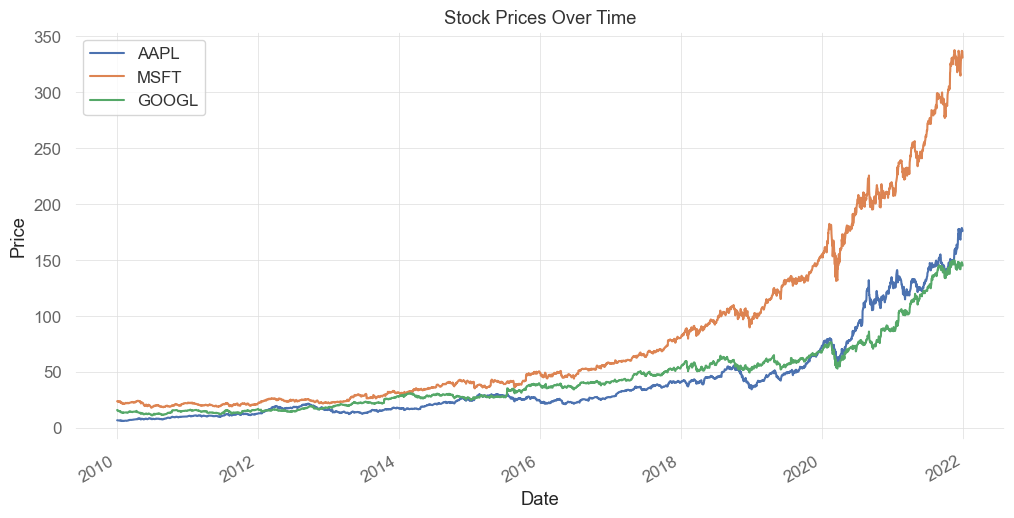

CAGR for AAPL: 31.68%
CAGR for MSFT: 24.68%
CAGR for GOOGL: 20.37%
Year-to-Year Volatility for AAPL: 28.05%
Year-to-Year Volatility for MSFT: 25.05%
Year-to-Year Volatility for GOOGL: 25.82%


In [20]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock tickers
tickers = ["AAPL", "MSFT", "GOOGL"]

# Set the date range
start_date = "2010-01-01"
end_date = "2022-01-01"

# Create an empty DataFrame to store stock data
data = pd.DataFrame()

# Fetch historical data for each ticker and calculate daily returns
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date)
    df["Daily_Return"] = df["Adj Close"].pct_change()
    data[ticker] = df["Adj Close"]

# Calculate total returns (assuming dividends are reinvested) for each ticker
total_returns = (data / data.iloc[0]).fillna(1.0)

# Plot the stock prices
data.plot(figsize=(12, 6))
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Calculate and print CAGR for each ticker
for ticker in tickers:
    price_at_start = data[ticker][0]
    price_at_end = data[ticker][-1]
    num_years = len(data) / 252  # Assuming 252 trading days in a year
    cagr = (price_at_end / price_at_start) ** (1 / num_years) - 1
    print(f"CAGR for {ticker}: {cagr:.2%}")

# Calculate and print year-to-year volatility for each ticker
for ticker in tickers:
    annual_volatility = data[ticker].pct_change().std() * (252 ** 0.5)  # Annualize
    print(f"Year-to-Year Volatility for {ticker}: {annual_volatility:.2%}")
